# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup - - - - -  - - - - - - - - - - - 3/14/2020 - Randy Dettmer
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
import scipy.stats as st

import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Other variables added to be collected in the data frame
country_code = []
country = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    cityname = city.city_name
    countryname = city.country_code
    city_with_country = tuple([cityname.title(), countryname.upper()])
    
    
    # If the city is unique, then add it to a our cities list
    if city_with_country not in country_code:
        country_code.append(city_with_country)
        cities.append(city_with_country[0])
        country.append(city_with_country[1])

# Print the city count to confirm sufficient count
totalcities = len(cities)
print(totalcities)

621


In [8]:
#collect city, country, latitude and longitude into a data frame
city_df = pd.DataFrame({"City": cities, "Country": country})
city_df.head()

,City,Country
0,Srednekolymsk,RU
1,Severnoye,RU
2,Port Alfred,ZA
3,Cape Town,ZA
4,Bud,NO


In [9]:
#add other columns to data frame with "NaN" values for easier clean up
city_df["Latitude"] = np.nan
city_df["Longitude"] = np.nan
city_df["Max Temp(F)"] = np.nan
city_df["Humidity(%)"] = np.nan
city_df["Cloudiness(%)"] = np.nan
city_df["Wind Speed(MPH)"] = np.nan
city_df["Date"] = np.nan
city_df.head()

,City,Country,Latitude,Longitude,Max Temp(F),Humidity(%),Cloudiness(%),Wind Speed(MPH),Date
0,Srednekolymsk,RU,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Severnoye,RU,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Port Alfred,ZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cape Town,ZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bud,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#using openweather api wrapper
#create settings dictionary
settings = {"units": "imperial", "appid": weather_api_key}

#counter for API calls made to OpenWeatherAPI, max 60 calls per minute allowed for free APIcalls
api_call_count = 1

#counter to count the number of call sets
sets = 1

#get current time to set timer for max API calls
t0 = time.time()

#counter for city to see which city is being processed
city_count = 0

#iterate through dataframe rows
print('Beginning Data Retrieval')
print('--------------------------------------------------')

for index, row in city_df.iterrows():
    currentcity = row['City']
    try:
        print(f"Processing Record {api_call_count} of Set {sets}: {currentcity}")
        response = ow.get_current(currentcity, **settings)
        summary = ["coord.lat","coord.lon", "main.temp_max", "main.humidity", "clouds.all", "wind.speed", "dt"]
        weather_data = response(*summary)
        city_df.loc[index, "Latitude"] = weather_data[0]
        city_df.loc[index, "Longitude"] = weather_data[1]
        city_df.loc[index, "Max Temp(F)"] = weather_data[2]
        city_df.loc[index, "Humidity(%)"] = weather_data[3]
        city_df.loc[index, "Cloudiness(%)"] = weather_data[4]
        city_df.loc[index, "Wind Speed(MPH)"] = weather_data[5]
        city_df.loc[index, "Date"] = weather_data[6]
        city_count = city_count + 1
        
    except Exception as e:
        print(e)
        print("City not found. Skipping..")
    api_call_count = api_call_count + 1
    
    #loop to limit 57 API calls per minute
    if api_call_count == 57:
        t1 = time.time()
        #reset api counter for the next set of API calls
        api_call_count = 1
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0 = time.time()   
        
print(f"Processing successfully completed. Retrieved weather information for {city_count} cities")      
print('-------------------------------------------------------------------------------------------')        

Beginning Data Retrieval
--------------------------------------------------
Processing Record 1 of Set 1: Srednekolymsk
Processing Record 2 of Set 1: Severnoye
Processing Record 3 of Set 1: Port Alfred
Processing Record 4 of Set 1: Cape Town
Processing Record 5 of Set 1: Bud
Processing Record 6 of Set 1: Nikolskoye
Processing Record 7 of Set 1: Taga
Processing Record 8 of Set 1: Moerai
Processing Record 9 of Set 1: Constitucion
Processing Record 10 of Set 1: Deputatskiy
Processing Record 11 of Set 1: Campechuela
Processing Record 12 of Set 1: Taoudenni
Processing Record 13 of Set 1: Provideniya
Processing Record 14 of Set 1: Kloulklubed
Processing Record 15 of Set 1: Jabiru
HTTP Error 404: Not Found
City not found. Skipping..
Processing Record 16 of Set 1: Punta Arenas
Processing Record 17 of Set 1: Hami
Processing Record 18 of Set 1: Zheleznodorozhnyy
Processing Record 19 of Set 1: Vaini
Processing Record 20 of Set 1: Ilulissat
Processing Record 21 of Set 1: Kirensk
Processing Record 

Processing Record 9 of Set 4: San Ramon
Processing Record 10 of Set 4: The Valley
Processing Record 11 of Set 4: Barawe
HTTP Error 404: Not Found
City not found. Skipping..
Processing Record 12 of Set 4: Sault Sainte Marie
Processing Record 13 of Set 4: Srivardhan
Processing Record 14 of Set 4: Kourou
Processing Record 15 of Set 4: Saint-Lo
Processing Record 16 of Set 4: Luhyny
Processing Record 17 of Set 4: Yining
Processing Record 18 of Set 4: Dronten
Processing Record 19 of Set 4: Kavieng
Processing Record 20 of Set 4: Polunochnoye
Processing Record 21 of Set 4: Leshukonskoye
Processing Record 22 of Set 4: Horadiz
Processing Record 23 of Set 4: Los Llanos De Aridane
Processing Record 24 of Set 4: Husavik
Processing Record 25 of Set 4: Acarau
Processing Record 26 of Set 4: Chuy
Processing Record 27 of Set 4: Port Elizabeth
Processing Record 28 of Set 4: Moba
Processing Record 29 of Set 4: Tual
Processing Record 30 of Set 4: Banikoara
Processing Record 31 of Set 4: Kalevala
Processing

HTTP Error 404: Not Found
City not found. Skipping..
Processing Record 25 of Set 7: Kamenka
Processing Record 26 of Set 7: Canutama
Processing Record 27 of Set 7: Vorukh
Processing Record 28 of Set 7: Hun
Processing Record 29 of Set 7: Port Moresby
Processing Record 30 of Set 7: Boyolangu
Processing Record 31 of Set 7: Rungata
HTTP Error 404: Not Found
City not found. Skipping..
Processing Record 32 of Set 7: Nishihara
Processing Record 33 of Set 7: Suntar
Processing Record 34 of Set 7: Olafsvik
Processing Record 35 of Set 7: Sovetskiy
Processing Record 36 of Set 7: Tezu
Processing Record 37 of Set 7: Deqing
Processing Record 38 of Set 7: Mataram
Processing Record 39 of Set 7: Lazaro Cardenas
Processing Record 40 of Set 7: Karaul
HTTP Error 404: Not Found
City not found. Skipping..
Processing Record 41 of Set 7: Kichmengskiy Gorodok
Processing Record 42 of Set 7: Marienburg
Processing Record 43 of Set 7: Quesnel
Processing Record 44 of Set 7: Torbay
Processing Record 45 of Set 7: Poum


Processing Record 39 of Set 10: Tagusao
Processing Record 40 of Set 10: Redlands
Processing Record 41 of Set 10: Oussouye
Processing Record 42 of Set 10: Svetlogorsk
Processing Record 43 of Set 10: Batagay
Processing Record 44 of Set 10: Carutapera
Processing Record 45 of Set 10: Luancheng
Processing Record 46 of Set 10: Saint-Augustin
Processing Record 47 of Set 10: Santa Marta
Processing Record 48 of Set 10: Tsukumi
Processing Record 49 of Set 10: Havelock
Processing Record 50 of Set 10: Fremont
Processing Record 51 of Set 10: Quelimane
Processing Record 52 of Set 10: Vagur
Processing Record 53 of Set 10: Shevchenkove
Processing Record 54 of Set 10: Bairiki
Processing Record 55 of Set 10: Dingle
Processing Record 56 of Set 10: Sinnamary
Processing Record 1 of Set 11: Morgan City
Processing Record 2 of Set 11: Fort Nelson
Processing Record 3 of Set 11: Bolshoye Sorokino
HTTP Error 404: Not Found
City not found. Skipping..
Processing Record 4 of Set 11: Samsun
Processing Record 5 of Se

In [12]:
#test for empty cells
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 9 columns):
City               621 non-null object
Country            621 non-null object
Latitude           560 non-null float64
Longitude          560 non-null float64
Max Temp(F)        560 non-null float64
Humidity(%)        560 non-null float64
Cloudiness(%)      560 non-null float64
Wind Speed(MPH)    560 non-null float64
Date               560 non-null float64
dtypes: float64(7), object(2)
memory usage: 43.8+ KB


In [13]:
#remove empty cells
city_df = city_df.dropna(how='any')
city_df.count()

City               560
Country            560
Latitude           560
Longitude          560
Max Temp(F)        560
Humidity(%)        560
Cloudiness(%)      560
Wind Speed(MPH)    560
Date               560
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#specify the file name to write dataframe to file and save

city_df.to_csv("output_data.csv", encoding='utf-8', index=False)

#display the city weather data frame
city_df.head()

,City,Country,Latitude,Longitude,Max Temp(F),Humidity(%),Cloudiness(%),Wind Speed(MPH),Date
0,Srednekolymsk,RU,67.45,153.68,-9.78,88.0,0.0,3.02,1.584312e+09
1,Severnoye,RU,56.35,78.36,33.04,86.0,100.0,21.41,1.584312e+09
2,Port Alfred,ZA,-33.59,26.89,63.00,97.0,100.0,3.00,1.584312e+09
3,Cape Town,ZA,-33.93,18.42,64.99,63.0,20.0,20.80,1.584312e+09
4,Bud,NO,39.45,-86.18,46.00,83.0,90.0,9.17,1.584312e+09


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

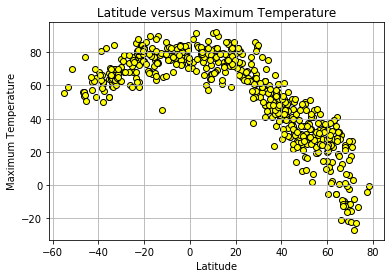

In [15]:
#plot lat vs max temp
plt.scatter(city_df.iloc[:,2], city_df.iloc[:,4], marker = 'o', facecolors = 'yellow', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude versus Maximum Temperature")
plt.grid()
plt.savefig("lat_vs_max_temp.png")

The plot for latitude vs temperature shows that once we get further north of the equator (latitude = 0) the temperature drops significatly.

Latitude vs. Humidity Plot

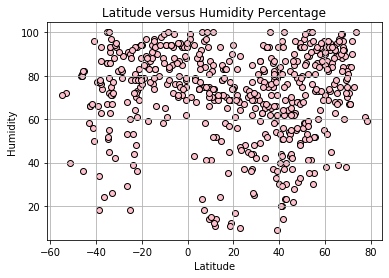

In [16]:
#plot lat vs humidity
plt.scatter(city_df.iloc[:,2], city_df.iloc[:,5], marker = 'o', facecolors = 'pink', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude versus Humidity Percentage")
plt.grid()
plt.savefig("lat_vs_humidity.png")

The plot for the latitude vs humitidty shows that despite the latitude, most of the higher humdity (values greater than 40%) are across all latitudes.

#### Latitude vs. Cloudiness Plot

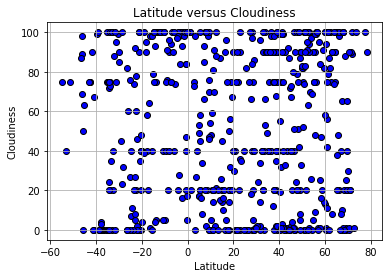

In [17]:
#plot lat vs cloudiness
plt.scatter(city_df.iloc[:,2], city_df.iloc[:,6], marker = 'o', facecolors = 'blue', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude versus Cloudiness")
plt.grid()
plt.savefig("lat_vs_cloudiness.png")

The plot for the latitude vs cloudiness shows that there really isn't any significat difference across the latitudes.

#### Latitude vs. Wind Speed Plot

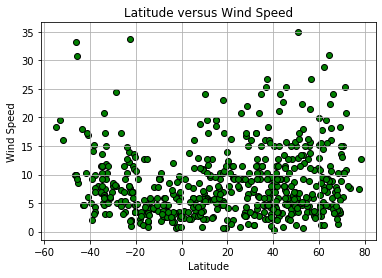

In [18]:
#plot lat vs wind speed
plt.scatter(city_df.iloc[:,2], city_df.iloc[:,7], marker = 'o', facecolors = 'green', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude versus Wind Speed")
plt.grid()
plt.savefig("lat_vs_windspeed.png")

The plot for latitude vs wind speed shows that regardless which latitude, the wind will range between 0 and 20 MPH. There doesn't seem to be a latitude that is immune to wind.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [19]:
#create northern and southern hemisphere dataFrames
#note, I included the equator (where lat = 0) as part of the southern hemisphere
northern = city_df.loc[(city_df["Latitude"] > 0), :]
north_df = pd.DataFrame(northern)
southern = city_df.loc[(city_df["Latitude"] <= 0), :]
south_df = pd.DataFrame(southern)

#print data frame to show tail of the southern hemisphere
south_df.tail()

,City,Country,Latitude,Longitude,Max Temp(F),Humidity(%),Cloudiness(%),Wind Speed(MPH),Date
606,Nauta,PE,-4.51,-73.58,78.51,86.0,97.0,2.62,1.584313e+09
607,Prata,BR,-19.31,-48.92,72.66,85.0,39.0,4.81,1.584313e+09
609,Kirakira,SB,-10.45,161.92,79.21,86.0,100.0,7.87,1.584313e+09
614,Chokwe,MZ,-24.53,32.98,73.96,92.0,11.0,5.41,1.584313e+09
617,Concordia,MX,-31.39,-58.02,70.00,95.0,95.0,5.99,1.584313e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8994808061562136


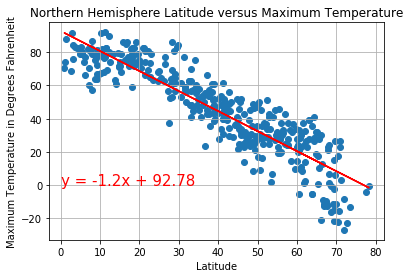

In [20]:
#plot northern hemisphere lat vs max temp
x_values = north_df.iloc[:,2]
y_values = north_df.iloc[:,4]
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,0), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature in Degrees Fahrenheit")
plt.title("Northern Hemisphere Latitude versus Maximum Temperature")
print(f"The r-squared is: {r_value}")
plt.grid()

The northern hemisphere - max temp vs latitude show that there seems to be a negative but strong correlation. The temperature the further north of the equator is colder.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6383612417616855


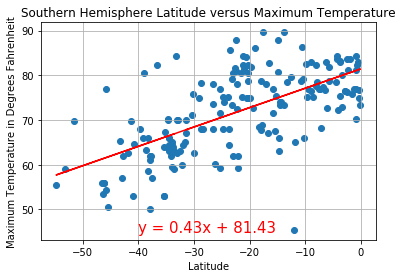

In [21]:
#plot southern hemisphere lat vs max temp
x_values = south_df.iloc[:,2]
y_values = south_df.iloc[:,4]
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40,45), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature in Degrees Fahrenheit")
plt.title("Southern Hemisphere Latitude versus Maximum Temperature")
print(f"The r-squared is: {r_value}")
plt.grid()

The southern hemisphere - max temp vs latitude show that there seems to be a moderate correlation. The temperature the further south of the equator is colder.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17209252950450768


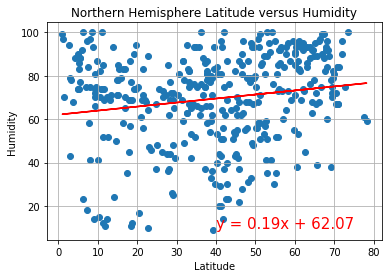

In [22]:
#plot northern hemisphere lat vs humidity
x_values = north_df.iloc[:,2]
y_values = north_df.iloc[:,5]
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Latitude versus Humidity")
print(f"The r-squared is: {r_value}")
plt.grid()

The northern hemisphere - latitude vs humidity has no correlation strength being only 0.17209.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.33621305953816616


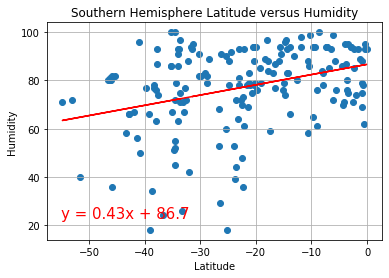

In [23]:
#plot southern hemisphere lat vs humidity
x_values = south_df.iloc[:,2]
y_values = south_df.iloc[:,5]
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,23), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Latitude versus Humidity")
print(f"The r-squared is: {r_value}")
plt.grid()

The southern hemisphere - latitude vs humidity has a weak correlation strength being only 0.3362.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1386981453748098


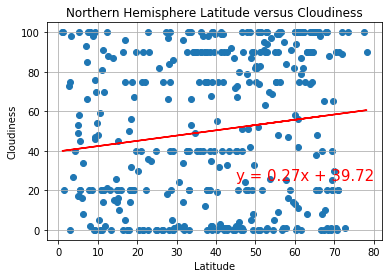

In [24]:
#plot northern hemisphere lat vs cloudiness
x_values = north_df.iloc[:,2]
y_values = north_df.iloc[:,6]
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45,25), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Latitude versus Cloudiness")
print(f"The r-squared is: {r_value}")
plt.grid()

The northern hemisphere - The cloudiness vs latitude doesn't show a strong correlation at 0.13869.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2257710545163435


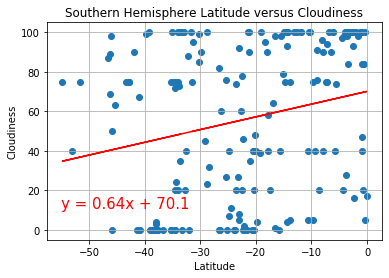

In [25]:
#plot southern hemisphere lat vs cloudiness
x_values = south_df.iloc[:,2]
y_values = south_df.iloc[:,6]
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,11), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Latitude versus Cloudiness")
print(f"The r-squared is: {r_value}")
plt.grid()

The southern hemisphere - The cloudiness vs latitude doesn't show a strong correlation at 0.22577.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11147376074977473


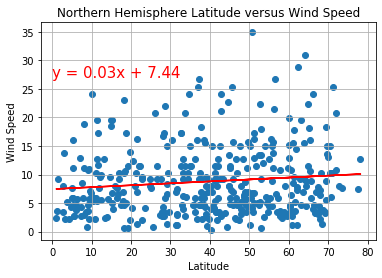

In [26]:
#plot northern hemisphere lat vs wind speed
x_values = north_df.iloc[:,2]
y_values = north_df.iloc[:,7]
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,27), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Latitude versus Wind Speed")
print(f"The r-squared is: {r_value}")
plt.grid()

The northern hemisphere - The wind speed vs latitude doesn't show a strong correlation at 0.11147.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4643591003494674


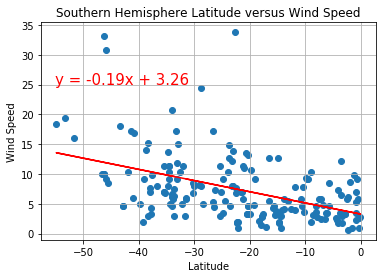

In [28]:
#plot southern hemisphere lat vs wind speed
x_values = south_df.iloc[:,2]
y_values = south_df.iloc[:,7]
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,25), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Latitude versus Wind Speed")
print(f"The r-squared is: {r_value}")
plt.grid()

The southern hemisphere - The wind speed vs latitude shows a weak but negative correlation at -0.46435.